# Face identification solution
This a solution for face ID task with ATT faces dataset https://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

all faces are available here https://www.cl.cam.ac.uk/research/dtg/attarchive/images/pictures/faces.gif

Install OpenCV with the following command (considering the other packages have been already installed before): 
* pip install opencv-contrib-python

Then download the faces pictures archive and put them to '/faces' folder

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import h5py
# import scipy
# from PIL import Image
# from scipy import ndimage
# from lr_utils import load_dataset
import cv2, os

%matplotlib inline

In [ ]:
def sigmoid(z):
    """utility function for sigmoid"""
    s = 1 / (1 + np.exp(-x))
    return s

In [91]:
# TODO: remove hard-coded path later
parent_folder = 'C:/Programs/ISD--ML/ml_course/face_ID/faces/s'
images = []
files=[]
Y=[]
for i in range(1, 41):
    path = parent_folder + str(i)
    Y.append(i)
    for file in os.listdir(path):
        filepath = path + '/' + file
        files.append(filepath)
        img = cv2.imread(filepath, -1)
        images.append(img)
len(images)

400

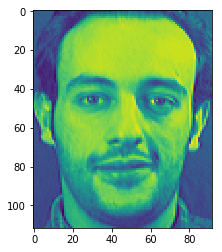

In [113]:
# check that images was read correctly: 
# it should be one person's face between indexes (0-9), (10-19),...,(390-399)
index = 152

plt.imshow(images[index])

In [75]:
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height)    
    Returns:
    v -- a vector of shape (length*height, 1)
    """
    v = image.reshape((image.shape[0]*image.shape[1]), 1)
    return v

In [108]:
rows = len(images)
""" we know, all pictures are the same size so
    it doesn't matter which of them to use, i.e. 3
"""
cols = images[3].shape[0] * images[3].shape[1]    
rows, cols

(400, 10304)

In [109]:
dataset=np.array([])
for img in images:
    img = image2vector(img)
    np.append(dataset, img)
dataset.shape

(0,)

In [ ]:
def read_data():
    # TODO: implement the function
    """this function reads the data from entire file and returns the
        dataset in such format:
        dataset = [ [Y1, image2vector(1)],
                    [Y1, image2vector(2)],
                    ...
                    [Y40, image2vector(400)]
        where Y1...Y40 - the IDs
        image2vector - is image represented in (92*112) form
    """
    pass

In [ ]:
def split_data(dataset, train_percentage=80):
    # TODO: implement the function
    """this function splits the datasets with given percentage
        and returns two separate sets - for train(80) and test(20) data
        
        train_percentage - how much % from dataset would be splited for train dataset
    
    """
    pass

In [ ]:
def train(dataset, target):
    #     TODO: implement the function
    """ this function should train dataset 
        returns vector of Wweights
    
    """
    pass